In [1]:
import pandas as pd
import numpy as np
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

iris_data = pd.read_csv('iris-data.csv')
#iris_data.head()

iris_data = pd.read_csv('iris-data.csv', na_values=['NA'])

iris_data.describe()

iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

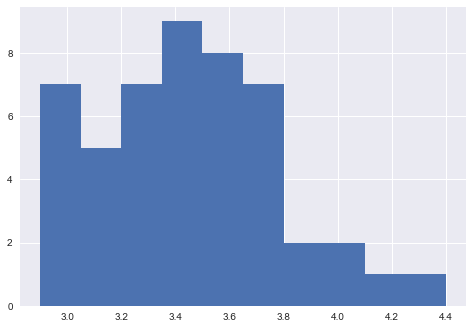

In [2]:
# This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

//anaconda/lib/python2.7/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


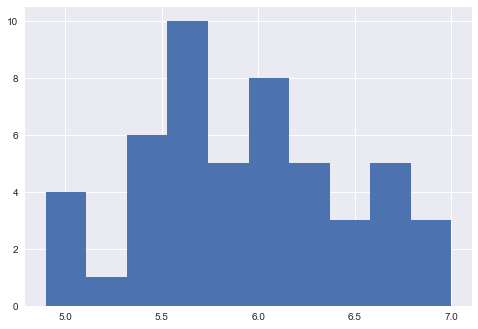

In [3]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

In [4]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


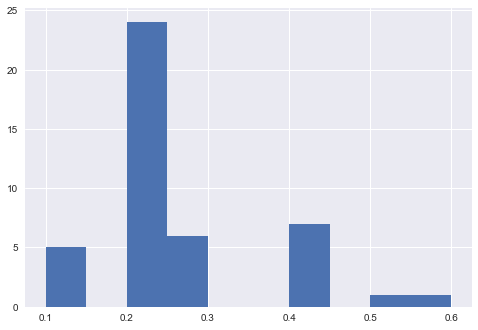

In [5]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

In [6]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [7]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [8]:
iris_data.to_csv('iris-data-clean.csv', index=False)

iris_data_clean = pd.read_csv('iris-data-clean.csv')

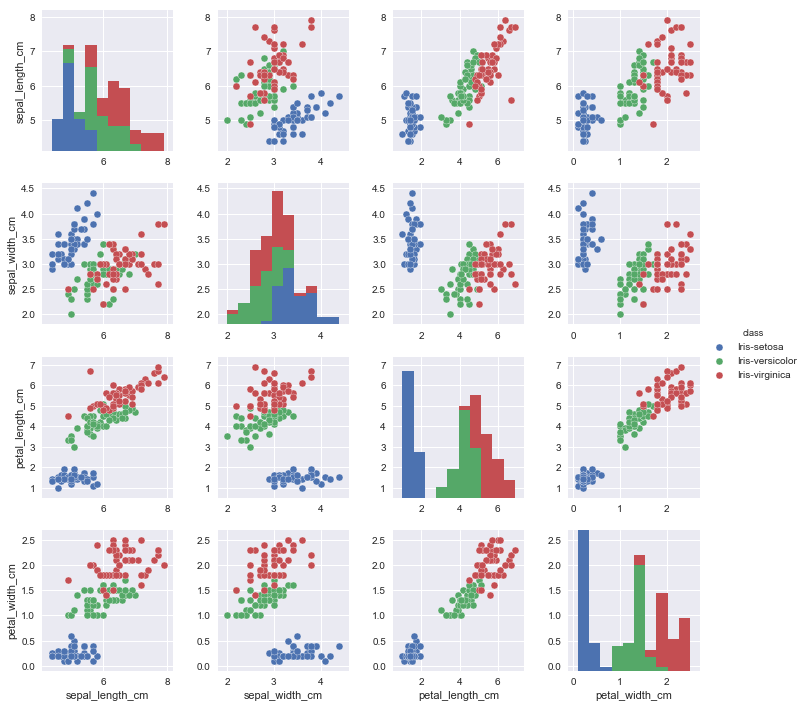

In [10]:
sb.pairplot(iris_data_clean,hue='class')
plt.show()

## training set: random subset of the data used to train our models.
## testing set: random subset of the data (mutually exclusive from the training set) used to validate our models.

In [3]:
all_inputs = iris_data_clean[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values

all_classes = iris_data_clean['class'].values

NameError: name 'iris_data_clean' is not defined

In [4]:
from sklearn.cross_validation import train_test_split

(training_inputs,
testing_inputs,
training_classes,
testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

NameError: name 'all_inputs' is not defined

# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# create a classifier
decision_tree_classifier = DecisionTreeClassifier()

# train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)


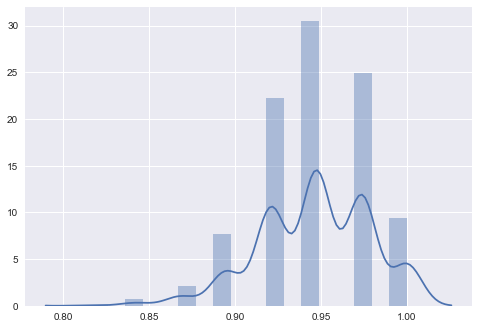

In [15]:
model_accuracy = []

for i in range(1000):
    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracy.append(classifier_accuracy)

sb.distplot(model_accuracy)
plt.show()

## cross-validation

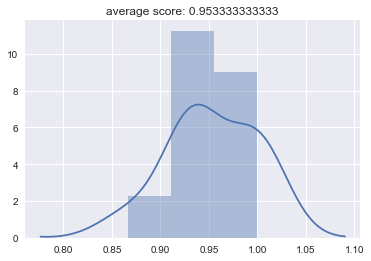

In [19]:
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(decision_tree_classifier,all_inputs,all_classes,cv=10)
sb.distplot(cv_scores)
plt.title('average score: {}'.format(np.mean(cv_scores)))
plt.show()

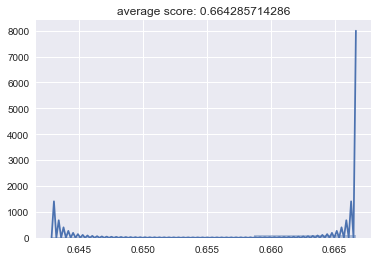

In [20]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier,all_inputs,all_classes,cv=10)

sb.distplot(cv_scores)
plt.title('average score: {}'.format(np.mean(cv_scores)))
plt.show()

In [22]:
# Grid Search for max_depth and max_features

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth':[1,2,3,4,5],
                 'max_features':[1,2,3,4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                          param_grid = parameter_grid,
                          cv = cross_validation)

grid_search.fit(all_inputs, all_classes)

print('best score:{}'.format(grid_search.best_score_))
print ('best parameters: {}'.format(grid_search.best_params_))

best score:0.959731543624
best parameters: {'max_features': 4, 'max_depth': 3}


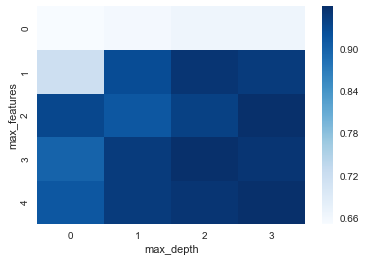

In [30]:
grid_visual = []

for grid_pair in grid_search.grid_scores_:
    grid_visual.append(grid_pair.mean_validation_score)
    
grid_visual = np.array(grid_visual)
grid_visual.shape=(5,4)

sb.heatmap(grid_visual,cmap='Blues')
plt.ylabel('max_features')
plt.xlabel('max_depth')

plt.show()


In [28]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=4, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [33]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'max_features':[1,2,3,4],
                 'n_estimators':[5,10,25,50]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(random_forest_classifier,
                          param_grid = parameter_grid,
                          cv = cross_validation)

grid_search.fit(all_inputs, all_classes)

print('best score:{}'.format(grid_search.best_score_))
print ('best parameters: {}'.format(grid_search.best_params_))

best score:0.96644295302
best parameters: {'max_features': 2, 'n_estimators': 5}


In [38]:
random_forest_classifier.fit(training_inputs,training_classes)

testing_inputs = [[4.0,3.8,1.7,0.3]]

for input_features, prediction, actual in zip(testing_inputs[:1],
                                            random_forest_classifier.predict(testing_inputs[:10]),
                                            testing_classes[:1]):
    print ('{}\t-->\t{}\t(Actual:{})'.format(input_features,prediction,actual))

[4.0, 3.8, 1.7, 0.3]	-->	Iris-setosa	(Actual:Iris-setosa)


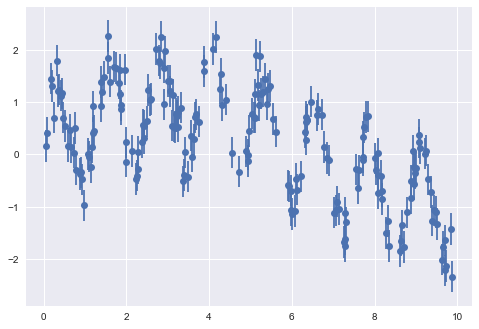

In [6]:
from sklearn.ensemble import RandomForestRegressor

rng = np.random.RandomState(42)

def model(x,sigma=0.3):
    fast = np.sin(5.0*x)
    slow = np.sin(0.5*x)
    noise = sigma*rng.randn(len(x))
    return slow+fast+noise

x = 10.0*rng.rand(200)
y = model(x)
plt.errorbar(x,y,0.3,fmt='o')
plt.show()

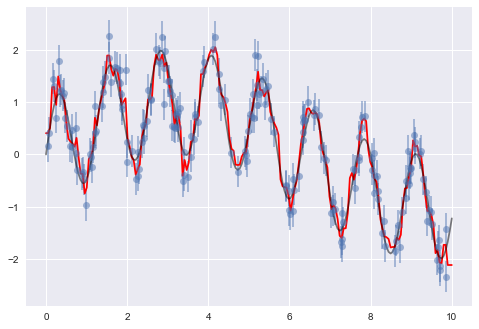

In [9]:
forest = RandomForestRegressor(200)
forest.fit(x[:,None],y)

xfit = np.linspace(0,10,200)
yfit = forest.predict(xfit[:,None])
ytrue = model(xfit,sigma=0)

plt.errorbar(x,y,0.3,fmt='o',alpha=0.5)
plt.plot(xfit,yfit,'r-')
plt.plot(xfit,ytrue,'k-',alpha=0.5)
plt.show()

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

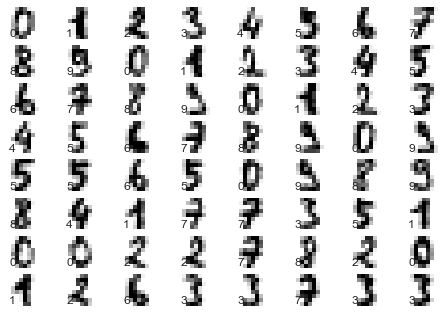

In [12]:
fig = plt.figure()
for i in range(64):
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap = plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(digits.target[i]))
plt.show()

In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

xtrain,xtest,ytrain,ytest = train_test_split(digits.data,digits.target,random_state=0)

model=RandomForestClassifier(n_estimators=1000)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)


//anaconda/lib/python2.7/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


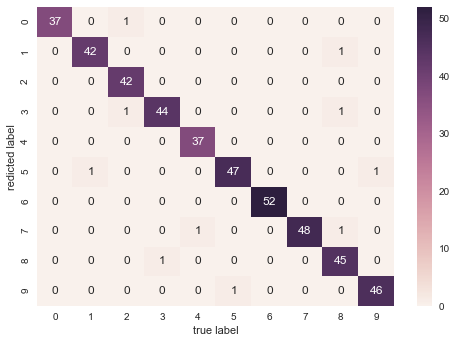

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,ypred)
sb.heatmap(mat.T,annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# Unsupervised learning

In [19]:
import pandas as pd

data = pd.read_csv('xclara.csv')

data.head()
print data.shape

(3000, 2)


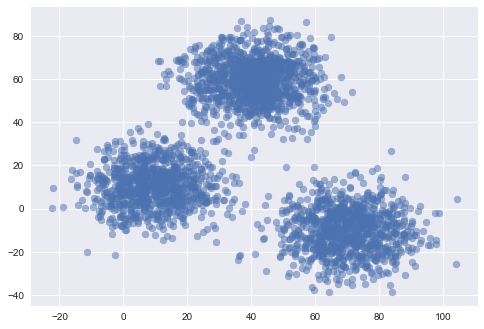

In [21]:
plt.scatter(data['V1'].values,data['V2'].values,alpha=0.5)
plt.show()

[[ 73.  17.]
 [ 36.   0.]]


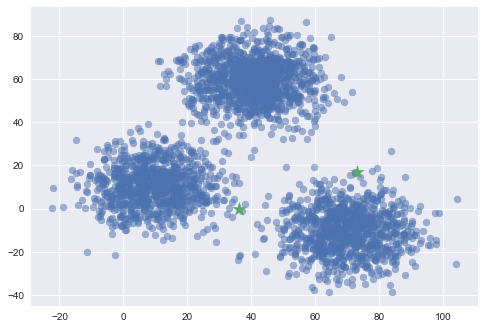

In [37]:
def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

# number of clusters
k =2 
X = np.array(list(zip(data['V1'].values,data['V2'].values)))

Cx = np.random.randint(0,np.max(X)-20,size=k)
Cy = np.random.randint(0,np.max(X)-20,size=k)

C = np.array(list(zip(Cx,Cy)),dtype=np.float32)

print (C)

plt.scatter(data['V1'].values,data['V2'].values,alpha=0.5)
plt.scatter(Cx,Cy,marker='*',s=200)
plt.show()

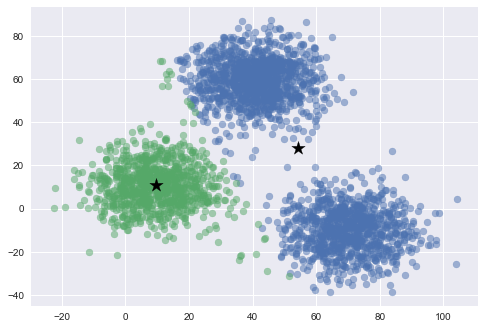

In [38]:
from copy import deepcopy
C_old = np.zeros(C.shape)

clusters = np.zeros(len(X))

# distance between new centroids and old centroids
error = dist(C,C_old,None)

while error !=0:
    # assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i],C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    # store the old centroid values
    C_old = deepcopy(C)
    
    # find the new centroids by taking the average
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        C[i] = np.mean(points, axis=0)
    error = dist(C,C_old,None)

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j]==i])
    ax.scatter(points[:,0],points[:,1],alpha=0.5)
ax.scatter(C[:,0],C[:,1],marker='*',s=200,c='k')
plt.show()

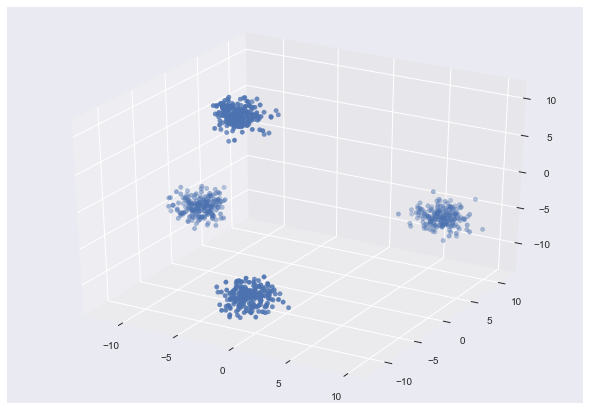

In [41]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import make_blobs

X,y=make_blobs(n_samples=800,n_features=3,centers=4)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2])
plt.show()


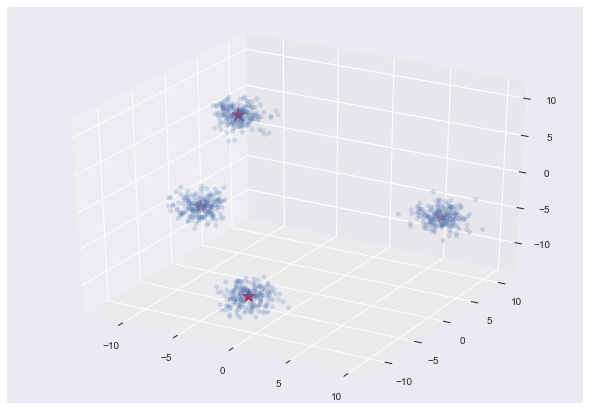

In [44]:
# initializing
kmeans = KMeans(n_clusters=4)

# fitting with inputs
kmeans = kmeans.fit(X)

labels = kmeans.predict(X)

c = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2],alpha=0.2)
ax.scatter(c[:,0],c[:,1],c[:,2],marker='*',c='r',s=200)
plt.show()


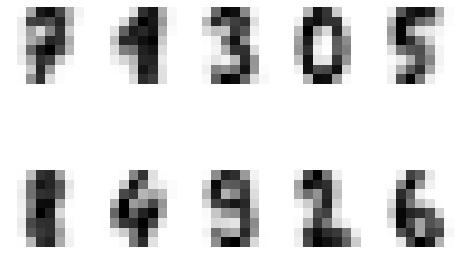

In [51]:
# use k-means 
kmeans=KMeans(n_clusters=10)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

fig,ax = plt.subplots(2,5)
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi,center in zip(ax.flat,centers):
    axi.set(xticks=[],yticks=[])
    axi.imshow(center,interpolation='nearest',cmap=plt.cm.binary)

plt.show()

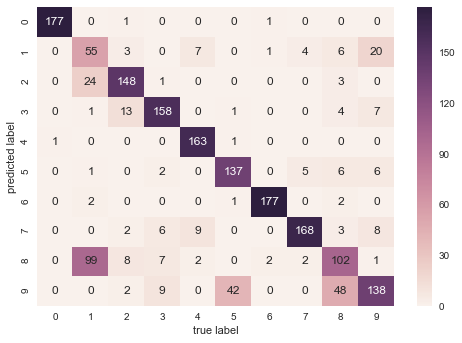

In [55]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters==i)
    labels[mask] = mode(digits.target[mask])[0]

mat = confusion_matrix(digits.target,labels)
sb.heatmap(mat.T,annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

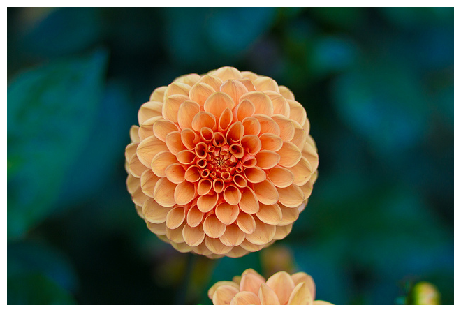

In [64]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [67]:
data = flower / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [58]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

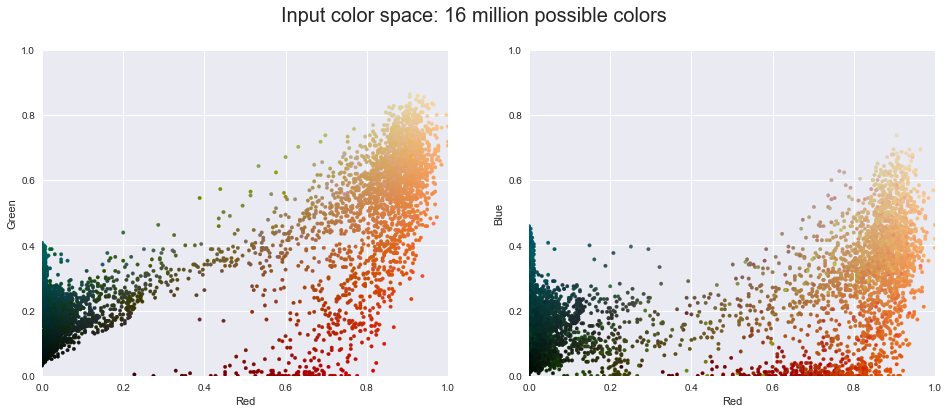

In [59]:
plot_pixels(data, title='Input color space: 16 million possible colors')
plt.show()

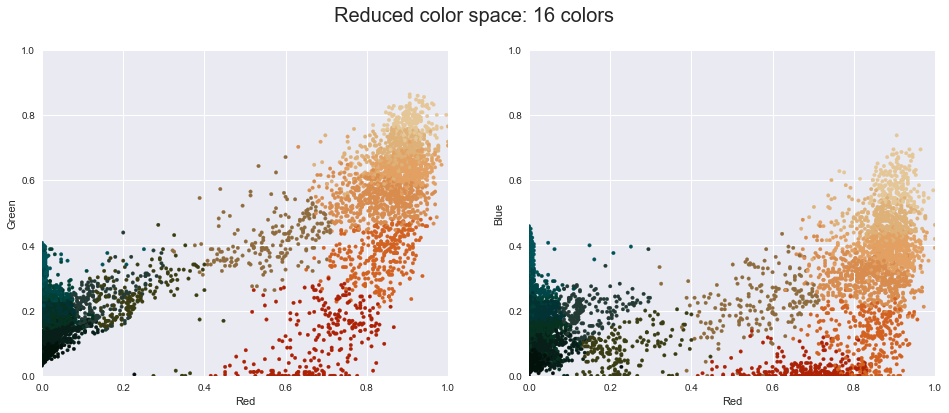

In [61]:
import warnings; warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

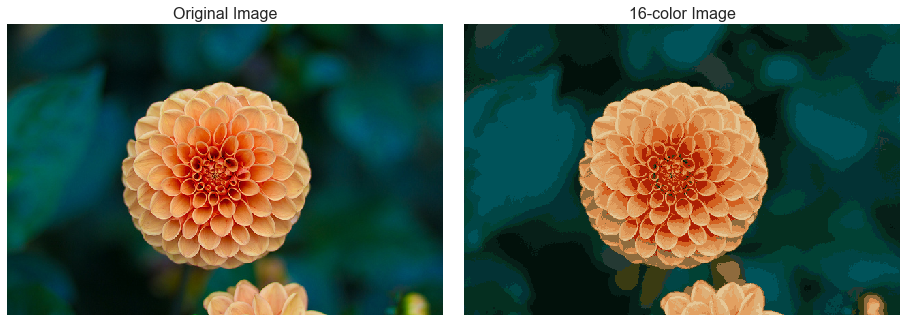

In [63]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16)
plt.show()